# Hands-on Quantum Computing with Pennylane

In [ ]:
pip install pennylane --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.6 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
import numpy as np

In [ ]:
n_qubits = 5

# Let's create a quantum circuit with 5 qubits.

# |0> -|H|--- M
# |0> -|H|--- M
# |0> -|H|--- M
# |0> -|H|--- M
# |0> -|H|--- M

# wires = number of qubits
# default.qubit -> ideal simulator (zero noise + infinite shots) from Pennylane
dev = qml.device("default.qubit", wires=n_qubits) # depending on the hardware provider, we can install plugins, ex: Amazon Braket, IonQ, Xanadu. etc

In [ ]:
def H_layer(n_qubits):
  """
    Layer of Hadamard gates (puts qubits into superposition).

    H |0> = |+> = 1/sqrt(2) |0> + 1/sqrt(2) |1>
  """

  for idx in range(n_qubits):
    qml.Hadamard(wires=idx)

In [ ]:
def RY_layer(theta):
  """
    Parameterized qubit rotations around the Y-axis.
  """

  for idx, angle in enumerate(theta):
    qml.RY(angle, wires=idx)

In [ ]:
# PQC: Parameterized Quantum Circuit

@qml.qnode(dev, interface="torch")
def pqc_exercise_1(ry_angle):
  """
    a) Put all qubits in superposition: |0> -> T|0> = |+>.
    b) Apply a controlled-not gate (CNOT) in (0,1), (1,2), (2,3), (3,4)
    c) Rotate all qubits around Y by pi/2.
  """

  # a) Apply our aforementioned Hadamard layer.
  H_layer(n_qubits)

  # equivalent to:
  # qml.Hadamard(wires=0)
  # qml.Hadamard(wires=1)
  # qml.Hadamard(wires=2)
  # qml.Hadamard(wires=3)
  # qml.Hadamard(wires=4)

  # b) Apply the CNOT
  for i in range(0, n_qubits - 1):
    qml.CNOT(wires=[i, i + 1])

    # CNOT([0, 1])
    # CNOT([1, 2])
    # CNOT([2, 3])
    # CNOT([3, 4])

  # c) Rotation around Y
  RY_layer([ry_angle, ry_angle, ry_angle, ry_angle, ry_angle])

  expected_values = [qml.expval(qml.PauliZ(qubit)) for qubit in range(n_qubits)]

  return expected_values

In [ ]:
pqc_exercise_1(ry_angle=0.2)

[tensor(-0.1987, dtype=torch.float64),
 tensor(-0.1987, dtype=torch.float64),
 tensor(-0.1987, dtype=torch.float64),
 tensor(-0.1987, dtype=torch.float64),
 tensor(-0.1987, dtype=torch.float64)]

In [ ]:
# we can also plot our circuit!
print(qml.draw(pqc_exercise_1)(ry_angle = np.pi/2))

0: ──H─╭●──RY(1.57)───────────────────────────────┤  
1: ──H─╰X─╭●─────────RY(1.57)─────────────────────┤  
2: ──H────╰X────────╭●─────────RY(1.57)───────────┤  
3: ──H──────────────╰X────────╭●─────────RY(1.57)─┤  
4: ──H────────────────────────╰X─────────RY(1.57)─┤  


(<Figure size 900x600 with 1 Axes>, <Axes: >)


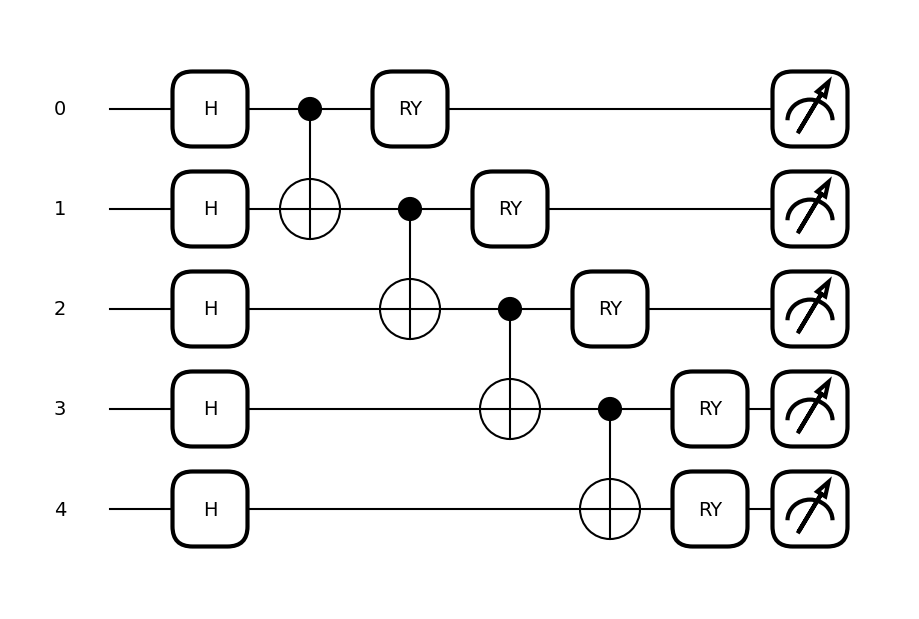

In [ ]:
# also in a different manner.
print(qml.draw_mpl(pqc_exercise_1)(ry_angle = np.pi/2))